In [438]:
import matplotlib.pyplot as plt
import numpy as np
import pyharm
from matplotlib.lines import Line2D

In [439]:
home_dir = "csv/"
#fnames = os.listdir(home_dir)

# 5 slices from the theta grid [0, 128)
theta_list = [0, 32, 64, 96, 127]
var_list = ["u1", "u3"]
spin_list = ["+0.94", "+0.5", "0", "-0.5", "-0.94"]

# dump is used to get r values only
dump = pyharm.load_dump("Sa0_0000.h5")
r = dump["r1d"]

# color scale for the theta values
theta_color = {
    theta_list[0]: 'blue',
    theta_list[1]: 'orange',
    theta_list[2]: 'green',
    theta_list[3]: 'red',
    theta_list[4]: 'purple'
    }

print(theta_color)

{0: 'blue', 32: 'orange', 64: 'green', 96: 'red', 127: 'purple'}


In [473]:
def plot(ax, spin, var='u^phi', keplerian=True, isco=False, yscale=None, xscale=None, divide_ut=False,fitrange=None, f=None, th_list=theta_list):
    a = float(spin)

    # get temporal + azimuthal averaged values of the angular velocity
    mean = np.loadtxt(home_dir + f"avg_{var}_{spin}.csv", delimiter=",") 

    # get boyer linguist value
    if divide_ut:
        ut = np.loadtxt(home_dir + f"avg_u^t_{spin}.csv", delimiter=",") 
        mean /= ut
    
    # Apply arbitrary function
    if f is not None:
        mean = f(mean)
    """
    sd = np.loadtxt(home_dir+"sd"+var+spin+".csv", delimiter=",")

    for th in range(len(theta_list)-2):
        ax.plot(r, mean[th], label="th="+str(theta_list[th]))
        plt.fill_between(r, mean[th]-sd[th], mean[th]+sd[th], label=str(theta_list[th])+"+-1sd", alpha=0.3)
    """

    # Plot r=isco
    if isco:
        a = float(spin)
        z1 = 1. + (1. - a * a) ** (1. / 3.) * ((1. + a)**( 1. / 3.) + (1. - a)**( 1. / 3.))
        z2 = np.sqrt(3. * a * a + z1 * z1)
        if a != 0:
            r_isco = 3. + z2 - (np.sqrt((3. - z1) * (3. + z1 + 2. * z2))*np.abs(a)/a)
        else:
            r_isco = 3. + z2 - (np.sqrt((3. - z1) * (3. + z1 + 2. * z2))*np.abs(a))
        ax.axvline(x=r_isco, linestyle='--')

    # Plot var of different theta values
    for th in range(len(th_list)):
        ax.plot(r, mean[th], theta_color[th_list[th]],label=r'$\theta=$'+str(th_list[th]))
    
    # fit straight line, originally 50:200
    if fitrange is not None:
        trend = np.polyfit(np.log(r)[fitrange[0]:fitrange[1]], np.log(mean[2])[fitrange[0]:fitrange[1]], 1)
        eq = np.poly1d(trend)
        ax.plot(r, np.exp(eq[0]) * (r ** eq[1]), linestyle="--", label=f"m= {round(trend[0], 4)}")

    # Plot keplerian
    if keplerian:
        ax.plot(r, 1/(r ** (1.5) + a), linestyle="--", label="Keplerian " + r"$r^{-3/2}$")

    # Formatting
    if spin_list.index(spin) == 0:
        ax.set_ylabel(f"{var}")
    ax.set_xlabel(f"r")
    ax.legend(loc=3, frameon=False)
    ax.set_title(f"{var}, spin={a}")
    
    # Set scale
    if xscale is not None:
        ax.set_xscale(xscale)
    if yscale is not None:
        ax.set_yscale(yscale)


# $q_\mathrm{shear}$
$\Omega=u^{\phi}/u^{t}$

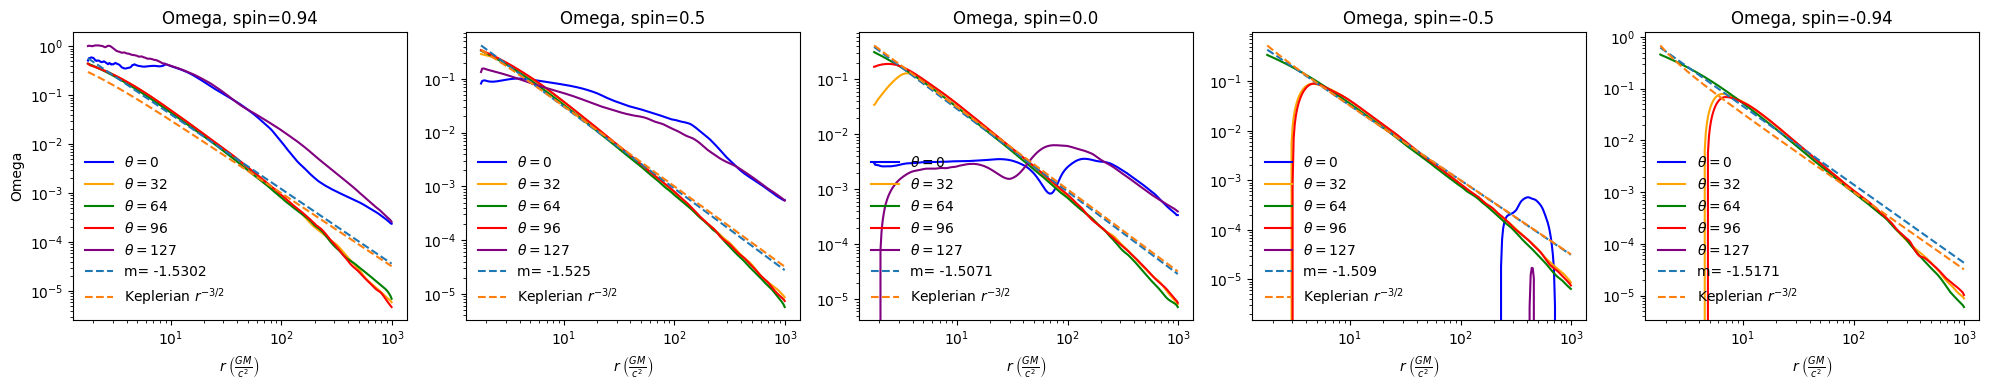

In [ ]:
# Plotting omega = u^phi / u^t
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""
for i in range(len(spin_list)):
    plot(axes[i], spin_list[i], var='Omega', xscale='log', yscale='log', fitrange=[0, 150],) # r from 0 to 50 GM/c^2
    axes[i].set_xlabel(pyharm.pretty('r'))
plt.tight_layout()
#plt.savefig(f'{var}.png')
plt.show()

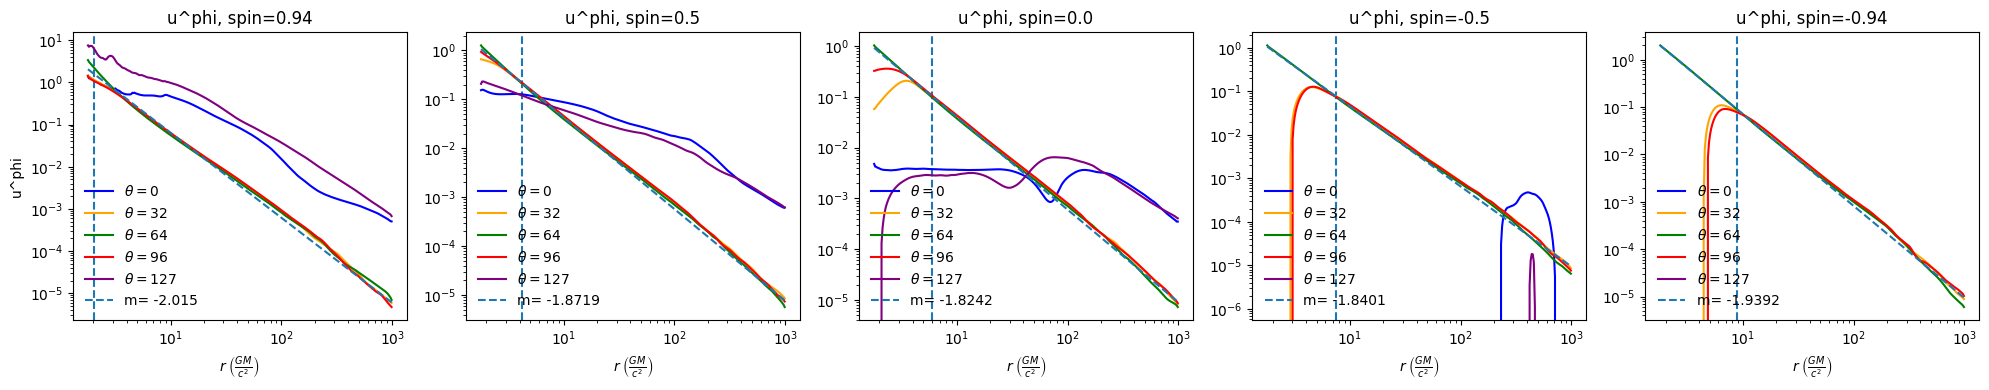

In [ ]:
# Plotting u^phi only
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""
for i in range(len(spin_list)):
    plot(axes[i], spin_list[i], var='u^phi', xscale='log', yscale='log', fitrange=[0, 150], keplerian=False, isco=True) # r from 50 to 140 GM/c^2
    axes[i].set_xlabel(pyharm.pretty('r'))
plt.tight_layout()
#plt.savefig(f'{var}.png')
plt.show()

# $n_R$

/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_27321/1925958287.py:40: RuntimeWarning: invalid value encountered in log
  trend = np.polyfit(np.log(r)[fitrange[0]:fitrange[1]], np.log(mean[2])[fitrange[0]:fitrange[1]], 1)


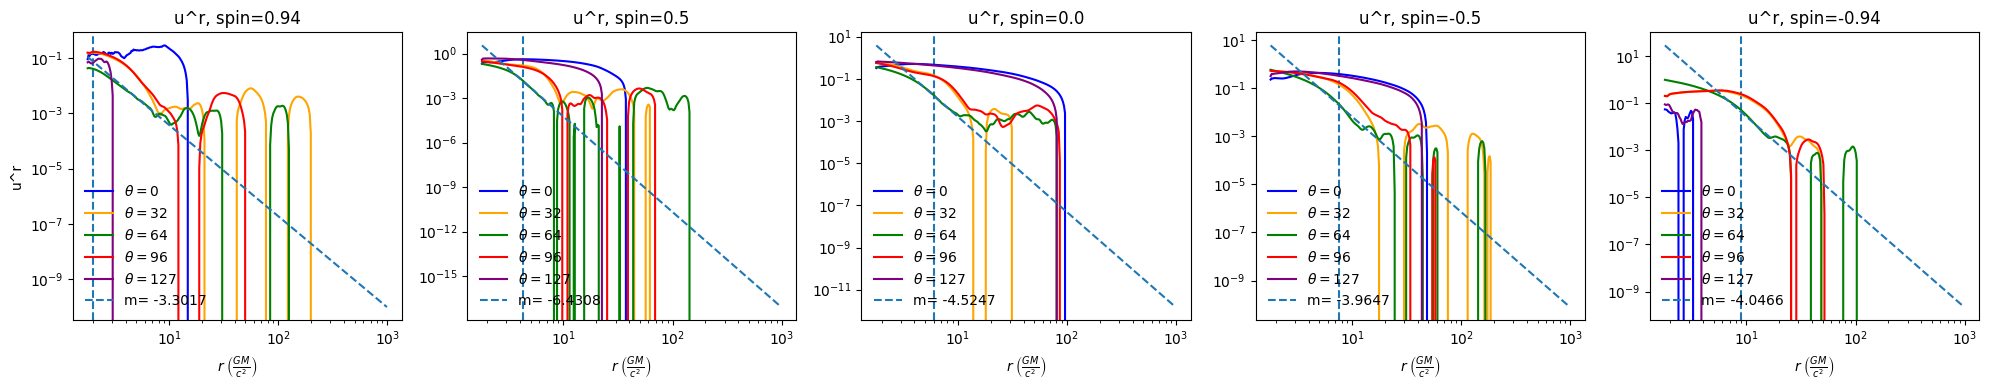

In [507]:
# Plotting v^r = u^r / u^t
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""

def neg(x):
    return -x

for i in range(len(spin_list)):
    # changing the fitrange according to aspin to only fit the range outside of r_isco
    if float(spin_list[i]) >= 0: 
        plot(axes[i], spin_list[i], var='u^r',fitrange=[40, 70], keplerian=False, xscale='log', yscale='log', isco=True, f=neg, divide_ut=True) # divide u^r by u^t
    else:
        plot(axes[i], spin_list[i], var='u^r',fitrange=[50, 100], keplerian=False, xscale='log', yscale='log', isco=True, f=neg, divide_ut=True) # divide u^r by u^t
    axes[i].set_xlabel(pyharm.pretty('r'))
    #axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_27321/1384673862.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim(0, 100)


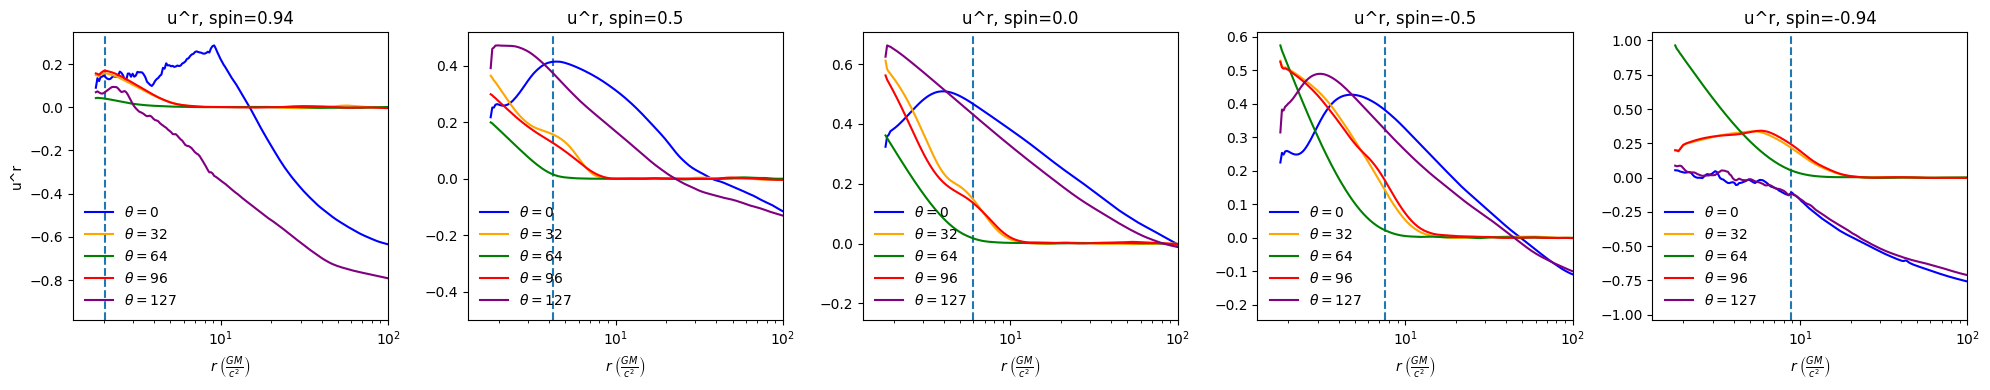

In [503]:
# Same graphs as above, but without log yscale, and set the x limit in between (0, 100]
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""
def neg(x):
    return -x

for i in range(len(spin_list)):
    if float(spin_list[i]) >= 0: # only fitting the range outside of r_isco
        plot(axes[i], spin_list[i], var='u^r', keplerian=False, xscale='log', isco=True, f=neg, divide_ut=True) 
    else:
        plot(axes[i], spin_list[i], var='u^r',keplerian=False, xscale='log', isco=True, f=neg, divide_ut=True) 
    axes[i].set_xlabel(pyharm.pretty('r'))
    axes[i].set_xlim(0, 100)
plt.tight_layout()
plt.show()

/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_27321/1925958287.py:40: RuntimeWarning: invalid value encountered in log
  trend = np.polyfit(np.log(r)[fitrange[0]:fitrange[1]], np.log(mean[2])[fitrange[0]:fitrange[1]], 1)
/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_27321/1673985370.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim(0, 100)


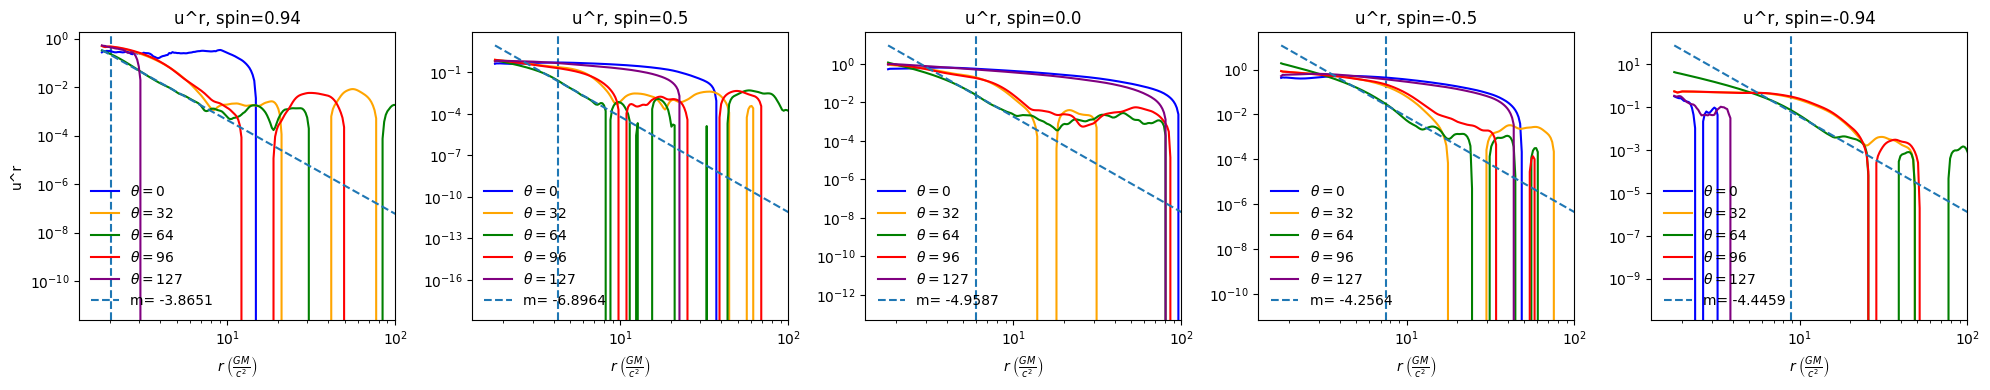

In [504]:
# Plotting u^r only
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""

def neg(x):
    return -x

for i in range(len(spin_list)):
    # changing the fitrange according to aspin to only fit the range outside of r_isco
    if float(spin_list[i]) >= 0: 
        plot(axes[i], spin_list[i], var='u^r',fitrange=[40, 70], keplerian=False, xscale='log', yscale='log', isco=True, f=neg,) 
    else:
        plot(axes[i], spin_list[i], var='u^r',fitrange=[50, 100], keplerian=False, xscale='log', yscale='log', isco=True, f=neg, )
    axes[i].set_xlabel(pyharm.pretty('r'))
    axes[i].set_xlim(0, 100)
    #axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_27321/924232352.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim(0, 100)
/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_27321/1925958287.py:40: RuntimeWarning: invalid value encountered in log
  trend = np.polyfit(np.log(r)[fitrange[0]:fitrange[1]], np.log(mean[2])[fitrange[0]:fitrange[1]], 1)


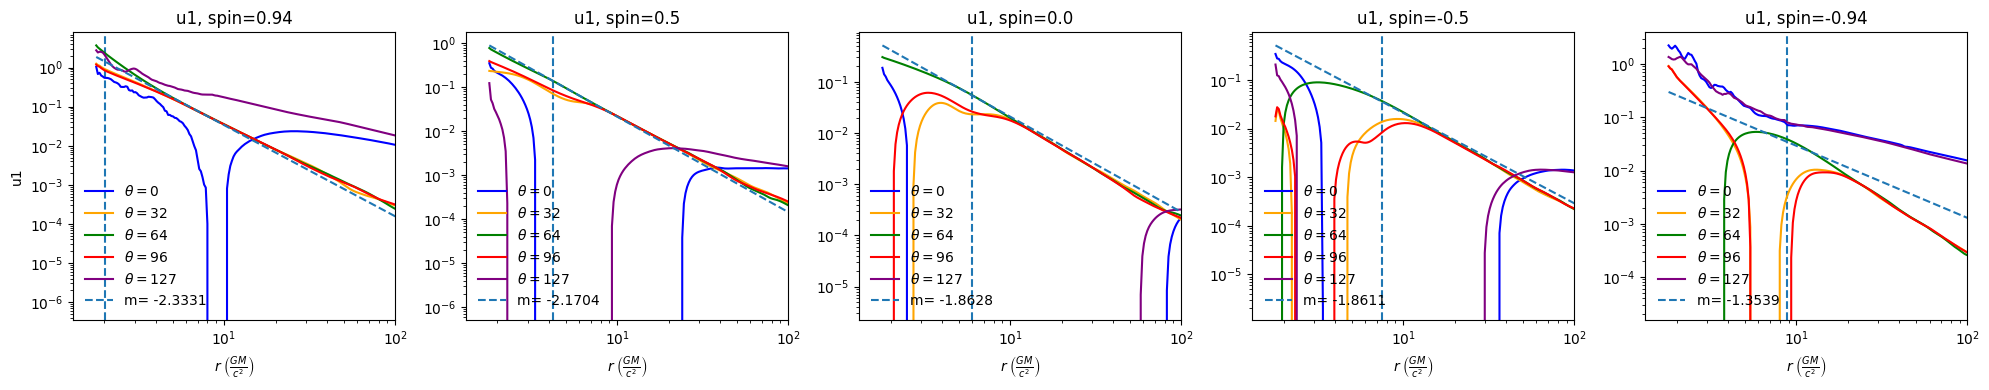

In [506]:
# Plotting u1 as comparison
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""

for i in range(len(spin_list)):
    # changing the fitrange according to aspin to only fit the range outside of r_isco
    if float(spin_list[i]) >= 0: 
        plot(axes[i], spin_list[i], var='u1',fitrange=[40, 70], keplerian=False, xscale='log', yscale='log', isco=True, ) 
    else:
        plot(axes[i], spin_list[i], var='u1',fitrange=[50, 100], keplerian=False, xscale='log', yscale='log', isco=True,)
    axes[i].set_xlabel(pyharm.pretty('r'))
    axes[i].set_xlim(0, 100)
    #axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

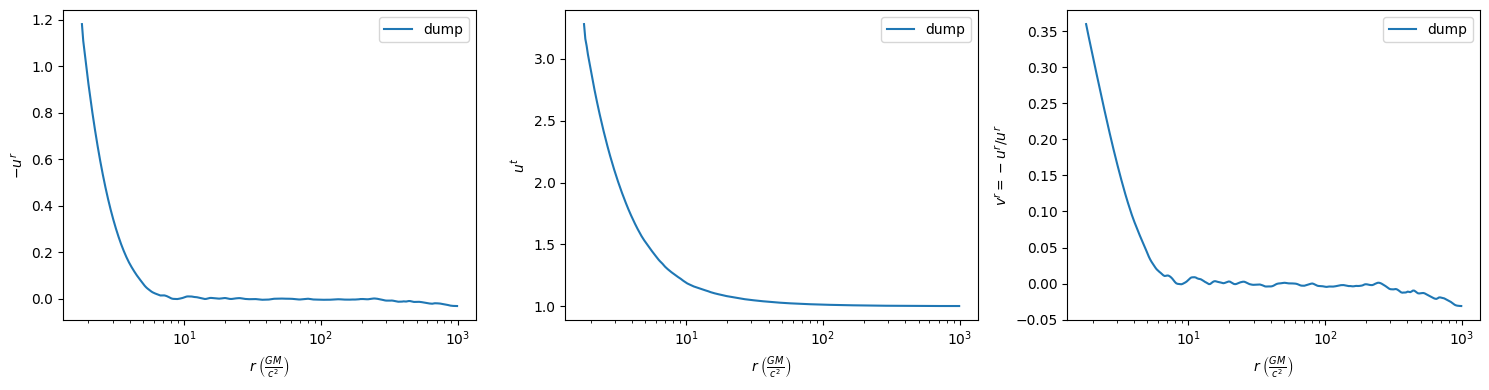

In [466]:
# Plotting quantities from single snapshot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ur = pyharm.shell_avg(dump, 'u^r', j_slice=[63, 64])
ut = pyharm.shell_avg(dump, 'u^t', j_slice=[63, 64])
vr = ur / ut

ax[0].plot(r, -ur, label='dump')
ax[0].set_ylabel(pyharm.pretty('-u^r'))
ax[1].plot(r, ut, label='dump')
ax[1].set_ylabel(pyharm.pretty('u^t'))
ax[2].plot(r, -vr, label='dump')
ax[2].set_ylabel(r'$v^r=-u^r/u^r$')

for i in range(3):
    ax[i].set_xlabel(pyharm.pretty('r'))
    ax[i].set_xscale('log')
    ax[i].legend()


plt.tight_layout()